# Climate Analysis

In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd

In [24]:
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [26]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
connection = engine.connect()

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
inspector = inspect(engine)

In [31]:
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [32]:
for table in tables:
    columns = inspector.get_columns(table)
    print(f"Table: {table}")
    for column in columns: 
        print(column["name"], column["type"])
    print("...")

Table: measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
...
Table: station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
...


In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#find the most recent date recorded
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [107]:
# Calculate the date 1 year ago from the last data point in the database
#find the date one year from the most recent/last data point in database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print(query_date)

2016-08-22


In [123]:
# Perform a query to retrieve the data and precipitation scores
# query to retrieve the last 12 months of precipitation data and plot the results
oneyear = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).\
    filter(Measurement.date > query_date).all()
oneyear

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [124]:
#unpack the date from the results of oneyear
date = [day[0] for day in oneyear[:]]
precip = [day[1] for day in oneyear[:]]

In [125]:
# Save the query results as a Pandas DataFrame and set the index to the date column
oneyear_df = pd.DataFrame(oneyear)
oneyear_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [126]:
#drop NaN values
oneyear_df = oneyear_df.dropna()
oneyear_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2224,2016-08-23,0.15
2225,2016-08-23,0.05
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [127]:
# change column names
# Sort the dataframe by date
# set index to date
oneyear_df = oneyear_df.rename(columns={"date":"Date", "prcp":"Precipitation"})
oneyear_df = oneyear_df.sort_values(by=["Date"])
oneyear_df = oneyear_df.set_index("Date")
oneyear_df

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


In [144]:
oneyear_df

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


NameError: name 'Date' is not defined

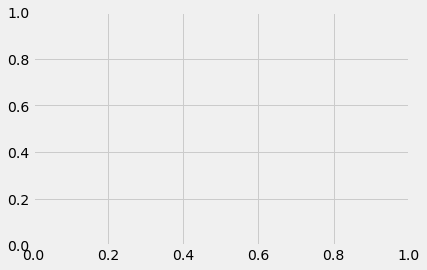

In [152]:
#Use Pandas Plotting with Matplotlib to plot the data
fix, ax = plt.subplots()
ax.bar(oneyear_df[Date], oneyear_df[Precipitation])
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (Inches)")
ax.set_title("Precipitation in Inches by Date")
fig.tight_layout()
plt.show()
# oneyear_df.iloc[201].plot.bar(title="Precipitation")
# plt.tight_layout()
# plt.show()

In [153]:
# Use Pandas to calcualte the summary statistics for the precipitation data
oneyear_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [154]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [165]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most = session.query(Station.id, Station.name, Station.station).value_counts(Station.name).order_by(Station.id.desc()).all()
most

AttributeError: 'Query' object has no attribute 'value_counts'

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
